In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np 
import pandas as pd

In [3]:
train=pd.read_csv(r"C:\MOHAN ST\Downloads\house-prices-advanced-regression-techniques\train.csv")
test=pd.read_csv(r"C:\MOHAN ST\Downloads\house-prices-advanced-regression-techniques\test.csv")

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

<Axes: >

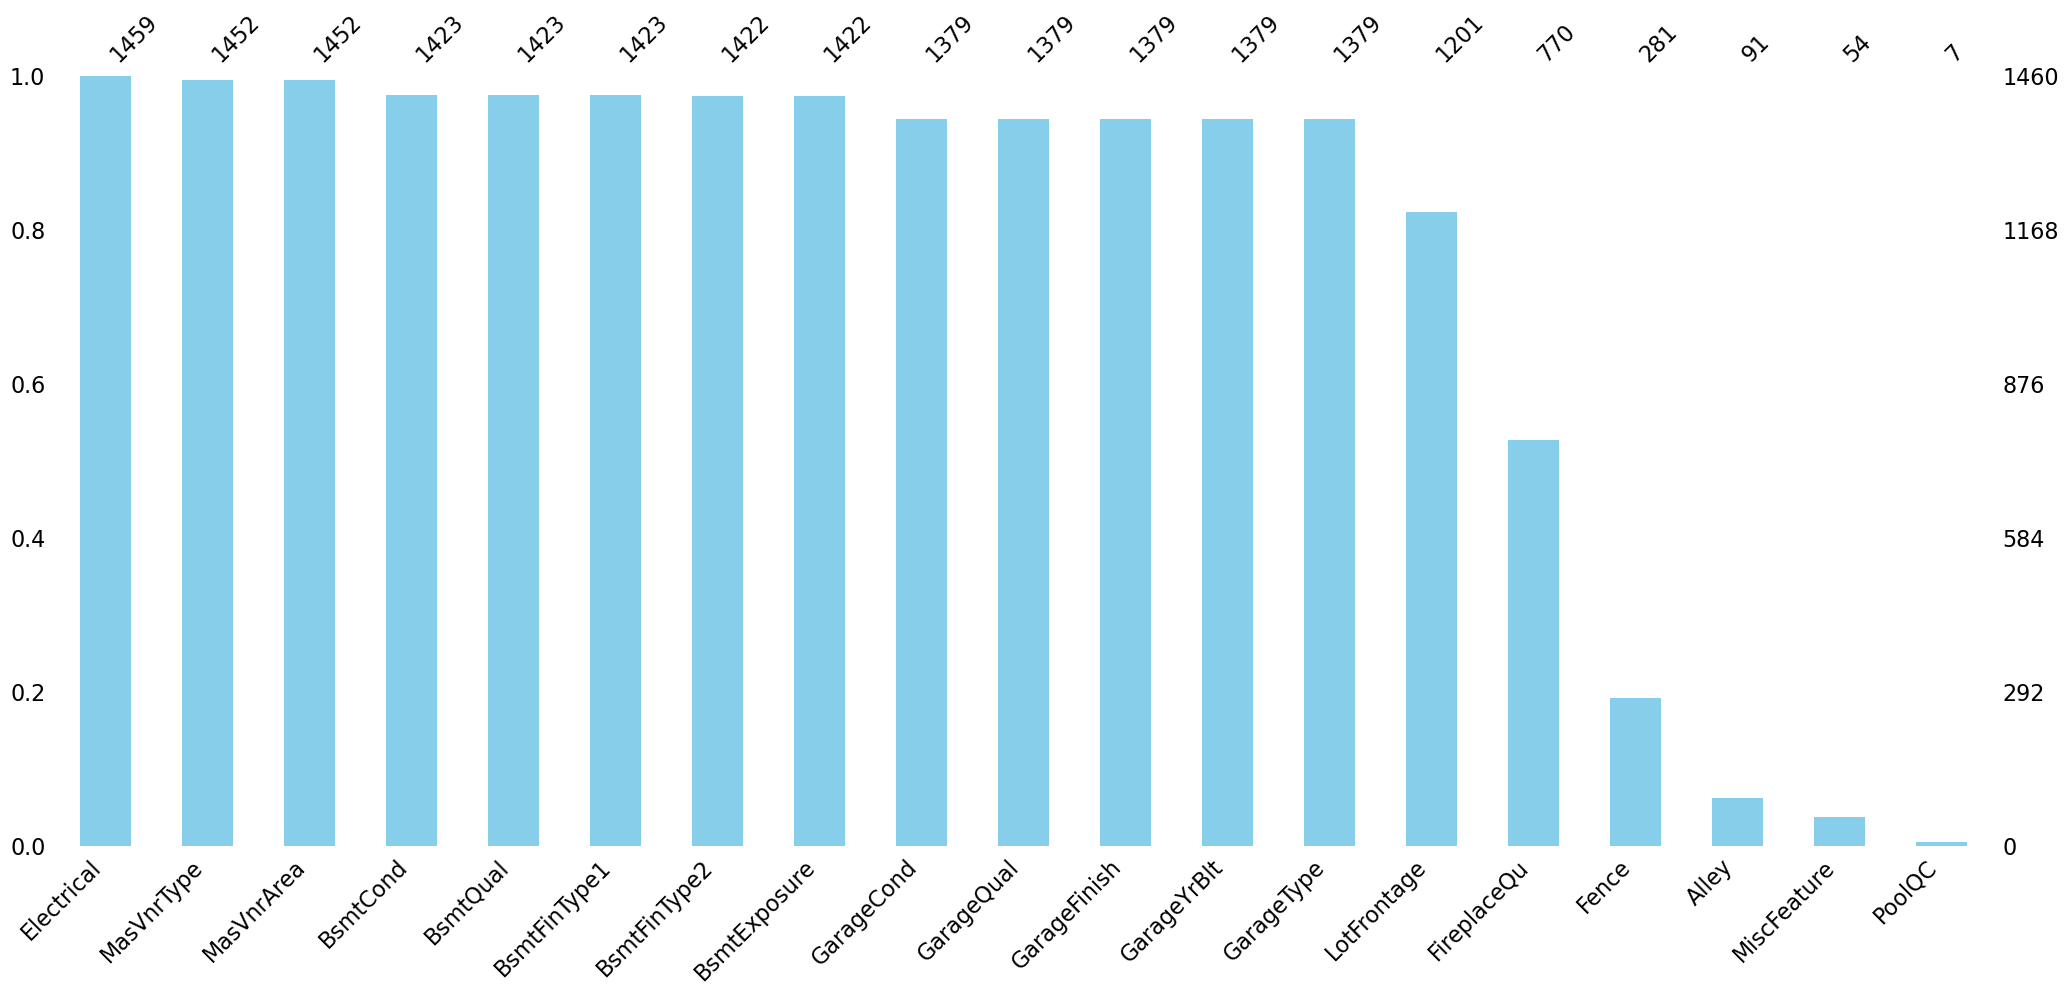

In [9]:
import missingno 
l=train.columns[train.isnull().any()]
missingno.bar(train[l],sort="descending",color='skyblue')

In [10]:
train=train.drop(['Id','FireplaceQu','Fence','Alley','MiscFeature','PoolQC'], axis=1)

In [11]:
obj=list(train.select_dtypes(['object']).columns)
obj

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [12]:
for i in train:
    train[i].fillna(train[i].mode()[0], inplace=True)

In [13]:
from sklearn.preprocessing import OrdinalEncoder
orden = OrdinalEncoder()
for i in obj:
    train[i] = orden.fit_transform(train[[i]])

In [14]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3.0,65.0,8450,1.0,3.0,3.0,0.0,4.0,0.0,...,0,0,0,0,0,2,2008,8.0,4.0,208500
1,20,3.0,80.0,9600,1.0,3.0,3.0,0.0,2.0,0.0,...,0,0,0,0,0,5,2007,8.0,4.0,181500
2,60,3.0,68.0,11250,1.0,0.0,3.0,0.0,4.0,0.0,...,0,0,0,0,0,9,2008,8.0,4.0,223500
3,70,3.0,60.0,9550,1.0,0.0,3.0,0.0,0.0,0.0,...,272,0,0,0,0,2,2006,8.0,0.0,140000
4,60,3.0,84.0,14260,1.0,0.0,3.0,0.0,2.0,0.0,...,0,0,0,0,0,12,2008,8.0,4.0,250000


<Axes: >

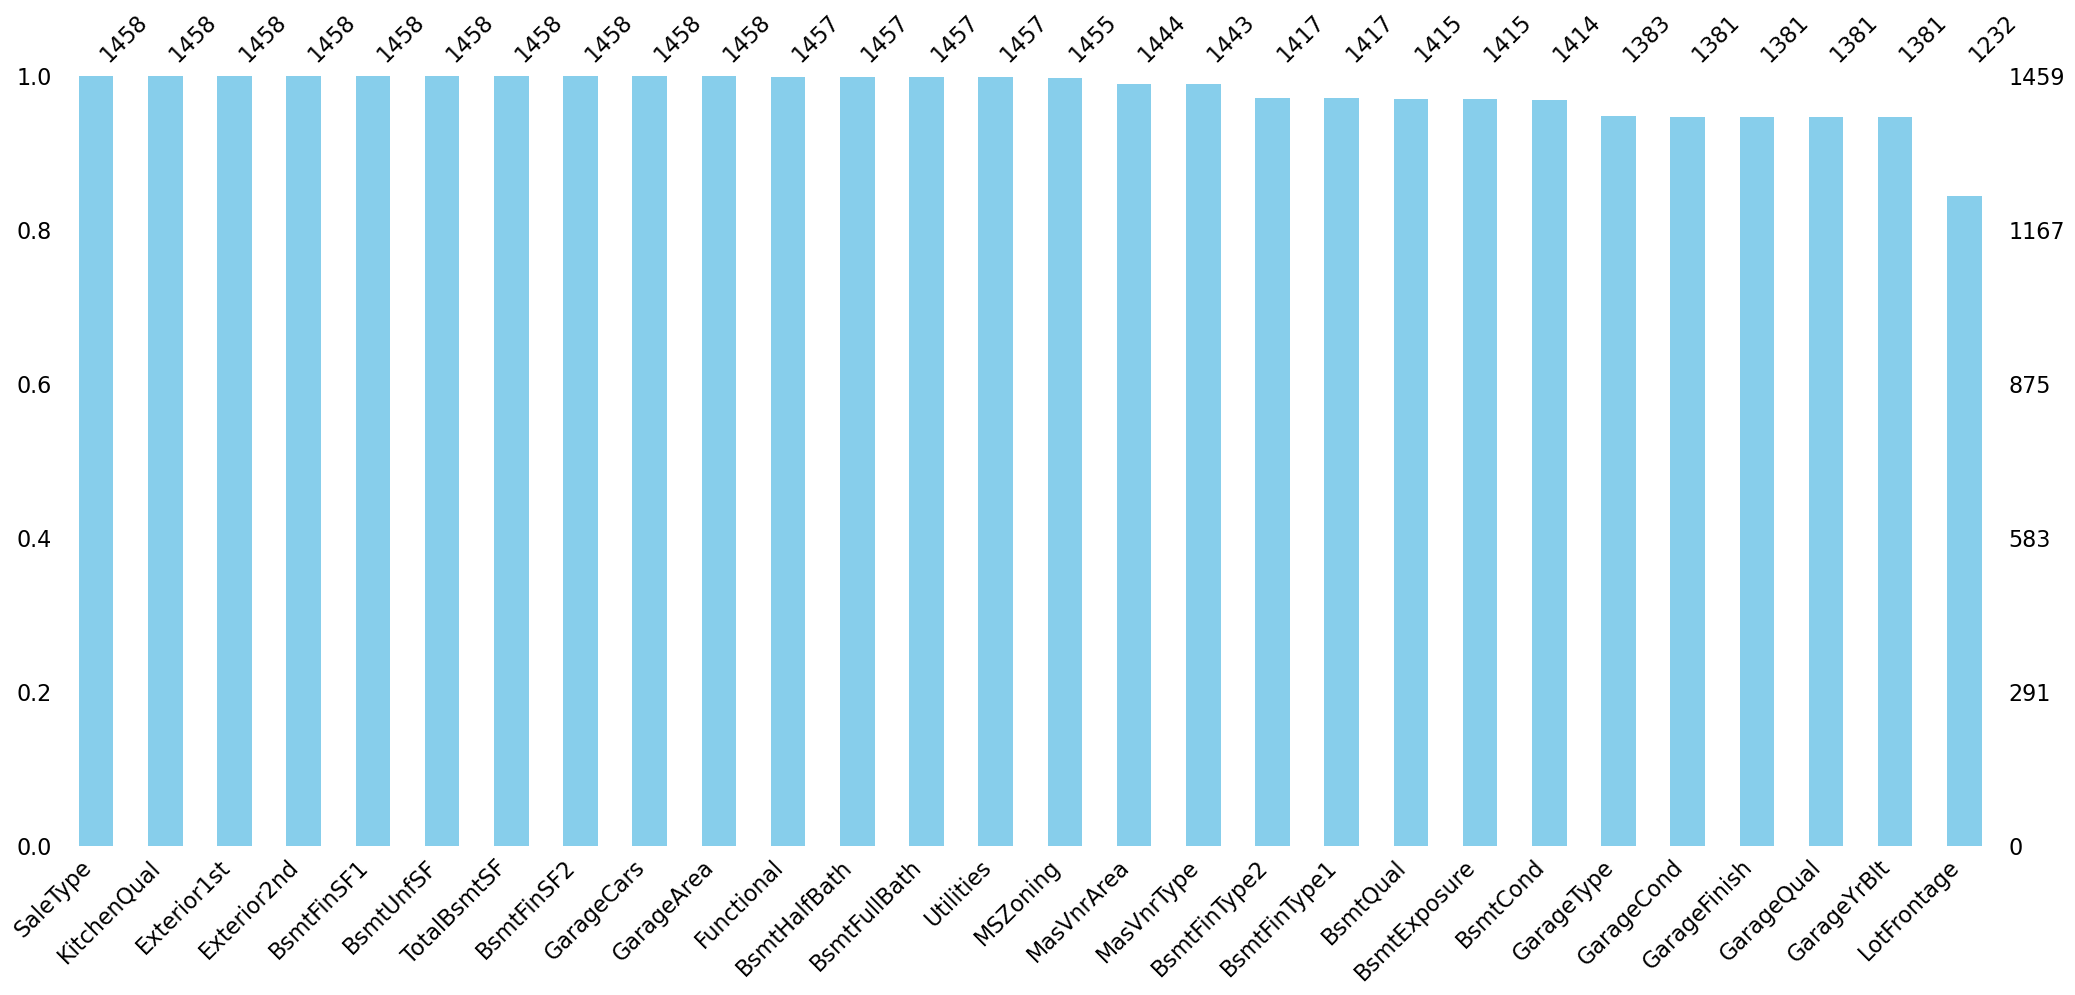

In [17]:
ls=test.columns[test.isnull().any()]
missingno.bar(test[ls],sort="descending",color='skyblue')

In [16]:
test=test.drop(['Id','FireplaceQu','Fence','Alley','MiscFeature','PoolQC'], axis=1)

In [18]:
for i in test:
    test[i].fillna(test[i].mode()[0], inplace=True)

In [19]:
obj1=list(test.select_dtypes(['object']).columns)
obj1

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [20]:
for i in obj1:
    test[i] = orden.fit_transform(test[[i]])

In [21]:
y = train['SalePrice']
X = pd.get_dummies(train.drop('SalePrice', axis=1))

In [22]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [23]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3.0,65.0,8450,1.0,3.0,3.0,0.0,4.0,0.0,...,61,0,0,0,0,0,2,2008,8.0,4.0
1,20,3.0,80.0,9600,1.0,3.0,3.0,0.0,2.0,0.0,...,0,0,0,0,0,0,5,2007,8.0,4.0
2,60,3.0,68.0,11250,1.0,0.0,3.0,0.0,4.0,0.0,...,42,0,0,0,0,0,9,2008,8.0,4.0
3,70,3.0,60.0,9550,1.0,0.0,3.0,0.0,0.0,0.0,...,35,272,0,0,0,0,2,2006,8.0,0.0
4,60,3.0,84.0,14260,1.0,0.0,3.0,0.0,2.0,0.0,...,84,0,0,0,0,0,12,2008,8.0,4.0


In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(n_jobs=100)
reg.fit(X, y)
reg_pred = reg.predict(test)
print(reg.score(X, y))

0.8492771272303438
